In [1]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
from sympy import *

%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'serif','size'   : 12})

#  Pure spin-orbit state mixing

Mix the states with the same $L$ (and $m_L$) and the same elctron configuration $\mid 5s5p \rangle$

LHS: mixed spin-orbit states, RHS: pure spin-orbit states

$\mid ^3 P_0 \rangle = \mid ^3 P^0_0 \rangle$

$\mid ^3 P_1 \rangle = \alpha \mid ^3 P_1^0 \rangle + \beta \mid ^1 P_1^0 \rangle$

$\mid ^3 P_2 \rangle = \mid ^3 P_2^0 \rangle$

$\mid ^1 P_1 \rangle = -\beta \mid ^3 P_1^0 \rangle + \alpha \mid ^1P_1^0 \rangle$

The intermediate coupling coefficients are determined by

$\frac{\alpha^2}{\beta^2} = \frac{\tau^{^3P_1}}{\tau^{^1P_1}} (\frac{\nu^{^3P1}}{\nu^{^1P1}})^3$, $\alpha^2 + \beta^2 = 1$

In [2]:
# Ratio of (alpha/beta)^2, according to Stellmer
from math import sqrt
from __future__ import division
c = (434829 / 650504)**3 * (30.5 / 0.0074)

# The beta coefficient is negative, according to Boyd 2007
beta = - sqrt(1 / (1 + c))
alpha = sqrt(c / (1 + c))
print (alpha, beta)

(0.9995940880788805, -0.028489631056776547)


# Hyperfine state mixing

In [3]:
alpha_0 = 2E-4
beta_0 = -4E-6
gamma_0 = -1E-6
alpha_1 = alpha_0 * alpha - beta_0 * beta
beta_1 = alpha_0 * beta + beta_0 * alpha
gamma_1 = gamma_0
print (alpha_1, beta_1, gamma_1)

(0.000199804859091549, -9.69630256367083e-06, -1e-06)


The lifetime of $^3P_0$ is given by

$\tau^{^3P_0} = (\frac{\lambda^{^3P_0 - ^1S_0}}{\lambda^{^3P_1 - ^1S_0}})^3 \frac{\beta^2}{(\alpha_0 \beta + \beta_0 \alpha)^2} \tau^{^3P_1}$

which is 193 seconds

In [4]:
from math import pi
(698 / 689)**3 * (beta / (alpha_0 * beta + beta_0 * alpha))**2 * 1 / (2 * pi * 7400)

We already have

$\mid ^3 P_0 \rangle = \mid ^3 P_0^0 \rangle + (\alpha_0 \alpha - \beta_0 \beta) \mid ^3 P_1^0 \rangle + (\alpha_0 \beta + \beta_0 \alpha) \mid ^1 P_1^0 \rangle + \gamma_0 \mid ^3 P_2^0 \rangle = \mid ^3 P_0^0 \rangle + \alpha_1 \mid ^3 P_1^0 \rangle + \beta_1 \mid ^1 P_1^0 \rangle + \gamma_1 \mid ^3 P_2^0 \rangle$

And ignore higher order of hyperfine mixing

$\mid ^3 P_1 \rangle = \alpha \mid ^3 P_1^0 \rangle + \beta \mid ^1 P_1^0 \rangle$

$\mid ^3 P_2 \rangle = \mid ^3 P_2^0 \rangle$

$\mid ^1 P_1 \rangle = -\beta \mid ^3 P_1^0 \rangle + \alpha \mid ^1P_1^0 \rangle$

# Hyperfine coupling

The magnetic dipole ($A$) and electric quadrupole ($Q$) contributions to the hyperfine interaction are

$H_A = A \vec{I} \cdot \vec{J}$

$H_Q = Q \frac{\frac{3}{2} \vec{I} \cdot \vec{J} (2 \vec{I} \cdot \vec{J} + 1) - IJ(I+1) (J+1)}{2IJ(2I-1)(2J-1)}$

Basically they couple states with the same $F$ ($\vec{F} = \vec{I} + \vec{J}$) and $m_F$. For these excited states,


$\mid ^3 P_1 \rangle: A = -260$ MHz, $Q = -35 $MHz

$\mid ^3 P_2 \rangle: A = -212 $ MHz, $Q = 67 $MHz 

$\mid ^1 P_1 \rangle: A = -3.4 $ MHz, $Q = 39$ MHz 

In [5]:
# In units of MHz
A_3P1 = -260
Q_3P1 = -35
A_3P2 = -212
Q_3P2 = 67
A_1P1 = -3.4
Q_1P1 = 39

nu_3P0_0 = 429500000
nu_3P1_0 = 434829000 
nu_3P2_0 = 441500000
nu_1P1_0 = 650504000

# Zeeman interaction with external magnetic field

$H_z = (g_S S_z + g_L L_z - g_I I_z) \mu_0 B$

where $g_S = 2, g_L = 1, g_I = \frac{\mu_I (1-\sigma_d)}{\mu_0 I}$

For $^{87} Sr$, $\mu_I = -1.09247 \mu_N, \sigma_d = 0.00345$ ($\sigma_d$ diamagnetic correction)

Then the full treatment including Zeeman interactions and HFI is

$H = H_Z + H_A + H_Q$

we assume these interactions are smaller than the fine structure such that we can use the spin-orbit mixed states as a basis.

# Clebsch-Gordan coefficients

## 1. Fine structure

We first express the pure spin-orbit states $\mid ^{2S + 1} P _ J ^0, m_J \rangle$ as a superposition of $\mid ^{2S + 1} P _ J ^0, m_S, m_L \rangle$ states using CG coefficients

$\mid ^{2S + 1} P _ J ^0, m_J \rangle = \sum_{m_S, m_L} C^{J, m_J}_{S, m_S, L, m_L} \mid ^{2S + 1} P _ J ^0, m_S, m_L \rangle$

Explicitly, we have

$\mid ^{3} P _ 0 ^0,  0\rangle = \mid ^{3} P _ 0 ^0, 0, 0 \rangle$


--------------------

$\mid ^{3} P _ 1 ^0, 1 \rangle = \frac{1}{\sqrt{2}}(\mid ^{3} P _ 1 ^0, 1, 0 \rangle - \mid ^{3} P _ 1 ^0, 0, 1 \rangle)$

$\mid ^{3} P _ 1 ^0, 0 \rangle = \frac{1}{\sqrt{2}}(\mid ^{3} P _ 1 ^0, 1, -1 \rangle - \mid ^{3} P _ 1 ^0, -1, 1 \rangle)$

$\mid ^{3} P _ 1 ^0, -1 \rangle = \frac{1}{\sqrt{2}}(\mid ^{3} P _ 1 ^0, -1, 0 \rangle - \mid ^{3} P _ 1 ^0, 0, -1 \rangle)$

------------------

$\mid ^{3} P _ 2 ^0, 2 \rangle = \mid ^{3} P _ 2 ^0, 1, 1 \rangle $

$\mid ^{3} P _ 2 ^0, 1 \rangle = \frac{1}{\sqrt{2}}(\mid ^{3} P _ 2 ^0, 1, 0 \rangle + \mid ^{3} P _ 2 ^0, 0, 1 \rangle)$

$\mid ^{3} P _ 2 ^0, 0 \rangle = \frac{\sqrt{2}}{\sqrt{3}}\mid ^{3} P _ 2 ^0, 0, 0 \rangle + \frac{1}{\sqrt{6}}\mid ^{3} P _ 2 ^0, 1, -1 \rangle + \frac{1}{\sqrt{6}}\mid ^{3} P _ 2 ^0, -1, 1 \rangle$

$\mid ^{3} P _ 2 ^0, -1 \rangle = \frac{1}{\sqrt{2}}(\mid ^{3} P _ 2 ^0, -1, 0 \rangle + \mid ^{3} P _ 2 ^0, 0, -1 \rangle)$

$\mid ^{3} P _ 2 ^0, -2 \rangle = \mid ^{3} P _ 2 ^0, -1, -1 \rangle $

--------------------

$\mid ^{1} P _ 1 ^0, 1 \rangle = \mid ^{1} P _ 1 ^0, 0, 1 \rangle $

$\mid ^{1} P _ 1 ^0, 0 \rangle = \mid ^{1} P _ 1 ^0, 0, 1 \rangle $

$\mid ^{1} P _ 1 ^0, -1 \rangle = \mid ^{1} P _ 1 ^0, 0, -1 \rangle$

For the mixed spin-orbit states, we have

$\mid ^{3} P _ 0,  0\rangle = \mid ^{3} P _ 0 ^0, 0, 0 \rangle$


--------------------

$\mid ^{3} P _ 1, 1 \rangle = \frac{\alpha}{\sqrt{2}}(\mid ^{3} P _ 1 ^0, 1, 0 \rangle - \mid ^{3} P _ 1 ^0, 0, 1 \rangle) + \beta \mid ^{1} P _ 1 ^0, 0, 1 \rangle$

$\mid ^{3} P _ 1, 0 \rangle = \frac{\alpha}{\sqrt{2}}(\mid ^{3} P _ 1 ^0, 1, -1 \rangle - \mid ^{3} P _ 1 ^0, -1, 1 \rangle) + \beta \mid ^{1} P _ 1 ^0, 0, 0 \rangle$

$\mid ^{3} P _ 1, -1 \rangle = \frac{\alpha}{\sqrt{2}}(\mid ^{3} P _ 1 ^0, -1, 0 \rangle - \mid ^{3} P _ 1 ^0, 0, -1 \rangle) + \beta \mid ^{1} P _ 1 ^0, 0, -1 \rangle$

------------------

$\mid ^{3} P _ 2 , 2 \rangle = \mid ^{3} P _ 2 ^0, 1, 1 \rangle $

$\mid ^{3} P _ 2 , 1 \rangle = \frac{1}{\sqrt{2}}(\mid ^{3} P _ 2 ^0, 1, 0 \rangle + \mid ^{3} P _ 2 ^0, 0, 1 \rangle)$

$\mid ^{3} P _ 2 , 0 \rangle = \frac{\sqrt{2}}{\sqrt{3}}\mid ^{3} P _ 2 ^0, 0, 0 \rangle + \frac{1}{\sqrt{6}}\mid ^{3} P _ 2 ^0, 1, -1 \rangle + \frac{1}{\sqrt{6}}\mid ^{3} P _ 2 ^0, -1, 1 \rangle$

$\mid ^{3} P _ 2 , -1 \rangle = \frac{1}{\sqrt{2}}(\mid ^{3} P _ 2 ^0, -1, 0 \rangle + \mid ^{3} P _ 2 ^0, 0, -1 \rangle)$

$\mid ^{3} P _ 2 , -2 \rangle = \mid ^{3} P _ 2 ^0, -1, -1 \rangle $

--------------------

$\mid ^{1} P _ 1, 1 \rangle = -\frac{\beta}{\sqrt{2}}(\mid ^{3} P _ 1 ^0, 1, 0 \rangle - \mid ^{3} P _ 1 ^0, 0, 1 \rangle) + \alpha \mid ^{1} P _ 1 ^0, 0, 1 \rangle$

$\mid ^{1} P _ 1, 0 \rangle = -\frac{\beta}{\sqrt{2}}(\mid ^{3} P _ 1 ^0, 1, -1 \rangle - \mid ^{3} P _ 1 ^0, -1, 1 \rangle) + \alpha \mid ^{1} P _ 1 ^0, 0, 0 \rangle$

$\mid ^{1} P _ 1, -1 \rangle = -\frac{\beta}{\sqrt{2}}(\mid ^{3} P _ 1 ^0, -1, 0 \rangle - \mid ^{3} P _ 1 ^0, 0, -1 \rangle) + \alpha \mid ^{1} P _ 1 ^0, 0, -1 \rangle$

In [6]:
from sympy.physics.quantum.cg import CG
from sympy import S
for s in [-1, 0, 1]:
    cg = CG(1, s, S(9)/2, S(3)/2 - s, S(11)/2, S(3)/2)
    print cg.doit()

sqrt(330)/55
2*sqrt(385)/55
sqrt(1155)/55


In [7]:
# CG coefficients

from sympy.physics.quantum.cg import CG
from sympy import S
from numpy import zeros, ones, array

# 3P1 states.
CG_3P1 = zeros((3,3))
CG_3P2 = zeros((5,3))
CG_1P1 = zeros((3,1))
CG_3P0 = zeros((1,3))

# 3P1, S, L, m_S, m_L, J, m_J
Eigen_3P1 = zeros((3,3),dtype='S3, d, d, d, d, d, d')
Eigen_3P2 = zeros((5,3),dtype='S3, d, d, d, d, d, d')
Eigen_1P1 = zeros((3,1),dtype='S3, d, d, d, d, d, d')
Eigen_3P0 = zeros((1,3),dtype='S3, d, d, d, d, d, d')

CGcoefficients1 = [CG_3P1, CG_3P2, CG_1P1, CG_3P0]
Eigenvalues1 = [Eigen_3P1, Eigen_3P2, Eigen_1P1, Eigen_3P0]
Index1 = ['3P1', '3P2', '1P1', '3P0']


# 3P1 states
# (m, n) indexes, (j, s) = (m_J, m_S)
for m, j in enumerate(range(-1, 2, 1)):
    for n, s in enumerate(range(-1, 2, 1)):
        cg = CG(1, s, 1, j - s, 1, j)
        CGcoefficients1[0][m][n] = cg.doit()
        Eigenvalues1[0][m][n][0] = '3P1'
        Eigenvalues1[0][m][n][1] = 1
        Eigenvalues1[0][m][n][2] = 1
        Eigenvalues1[0][m][n][3] = s
        Eigenvalues1[0][m][n][4] = j - s
        Eigenvalues1[0][m][n][5] = 1
        Eigenvalues1[0][m][n][6] = j
            
# 3P2 states
for m, j in enumerate(range(-2, 3, 1)):
    for n, s in enumerate(range(-1, 2, 1)):
        cg = CG(1, s, 1, j - s, 2, j)
        CGcoefficients1[1][m][n] = cg.doit()
        Eigenvalues1[1][m][n][0] = '3P2'
        Eigenvalues1[1][m][n][1] = 1
        Eigenvalues1[1][m][n][2] = 1
        Eigenvalues1[1][m][n][3] = s
        Eigenvalues1[1][m][n][4] = j - s
        Eigenvalues1[1][m][n][5] = 2
        Eigenvalues1[1][m][n][6] = j
            

# 1P1 states
for m, j in enumerate(range(-1, 2, 1)):
    cg = CG(0, 0, 1, j, 1, j)
    CGcoefficients1[2][m][0] = cg.doit()
    Eigenvalues1[2][m][0][0] = '1P1'
    Eigenvalues1[2][m][0][1] = 0
    Eigenvalues1[2][m][0][2] = 1
    Eigenvalues1[2][m][0][3] = 0
    Eigenvalues1[2][m][0][4] = j
    Eigenvalues1[2][m][0][5] = 1
    Eigenvalues1[2][m][0][6] = j
            
# 3P0 states
for n, s in enumerate(range(-1, 2, 1)):
    cg = CG(1, s, 1, -1 * s, 0, 0)
    CGcoefficients1[3][0][n] = cg.doit()
    Eigenvalues1[3][0][n][0] = '3P0'
    Eigenvalues1[3][0][n][1] = 1
    Eigenvalues1[3][0][n][2] = 1
    Eigenvalues1[3][0][n][3] = s
    Eigenvalues1[3][0][n][4] = -1 * s
    Eigenvalues1[3][0][n][5] = 0
    Eigenvalues1[3][0][n][6] = 0
         
print CG_3P1
print Eigen_3P0

[[-0.70710678  0.70710678  0.        ]
 [-0.70710678  0.          0.70710678]
 [ 0.         -0.70710678  0.70710678]]
[[('3P0', 1.0, 1.0, -1.0, 1.0, 0.0, 0.0)
  ('3P0', 1.0, 1.0, 0.0, 0.0, 0.0, 0.0)
  ('3P0', 1.0, 1.0, 1.0, -1.0, 0.0, 0.0)]]


In [9]:
# Include spin-orbit state mixing
# Enough to calculate the 3P2 3P1 1P1 states Zeeman shift
from numpy import concatenate

CG_3P1_c = concatenate((alpha * CG_3P1, beta * CG_1P1), axis=1)
CG_3P2_c = CG_3P2
CG_1P1_c = concatenate((alpha * CG_1P1, -1 * beta * CG_3P1), axis=1)
CG_3P0_c = CG_3P0

Eigen_3P1_c = concatenate((Eigen_3P1, Eigen_1P1), axis=1)
Eigen_3P2_c = Eigen_3P2
Eigen_1P1_c = concatenate((Eigen_1P1, Eigen_3P1), axis=1)
Eigen_3P0_c = Eigen_3P0

CGcoefficients2 = [CG_3P1_c, CG_3P2_c, CG_1P1_c, CG_3P0_c]
Eigenvalues2 = [Eigen_3P1_c, Eigen_3P2_c, Eigen_1P1_c, Eigen_3P0_c]
Index2 = ['3P1_c', '3P2_c', '1P1_c', '3P0_c']

print CG_3P0_c
print Eigen_1P1_c

[[ 0.57735027 -0.57735027  0.57735027]]
[[('1P1', 0.0, 1.0, 0.0, -1.0, 1.0, -1.0)
  ('3P1', 1.0, 1.0, -1.0, 0.0, 1.0, -1.0)
  ('3P1', 1.0, 1.0, 0.0, -1.0, 1.0, -1.0)
  ('3P1', 1.0, 1.0, 1.0, -2.0, 1.0, -1.0)]
 [('1P1', 0.0, 1.0, 0.0, 0.0, 1.0, 0.0)
  ('3P1', 1.0, 1.0, -1.0, 1.0, 1.0, 0.0)
  ('3P1', 1.0, 1.0, 0.0, 0.0, 1.0, 0.0)
  ('3P1', 1.0, 1.0, 1.0, -1.0, 1.0, 0.0)]
 [('1P1', 0.0, 1.0, 0.0, 1.0, 1.0, 1.0)
  ('3P1', 1.0, 1.0, -1.0, 2.0, 1.0, 1.0)
  ('3P1', 1.0, 1.0, 0.0, 1.0, 1.0, 1.0)
  ('3P1', 1.0, 1.0, 1.0, 0.0, 1.0, 1.0)]]


## 2. Hyperfine structure

Then we have

$\mid ^{2S + 1} P _ J , F, m_F \rangle = \sum_{m_J, m_I} C^{F, m_F}_{J, m_J, I, m_I} \mid ^{2S + 1} P _ J, m_J, m_I \rangle$

Explicitly, we have


$\mid ^{3} P _ 0, \frac{9}{2}, m_F\rangle = \mid ^{3} P _ 0, 0, m_F \rangle$


--------------------

$\mid ^{3} P _ 1, \frac{11}{2}, \frac{11}{2}\rangle = \mid ^{3} P _ 1, 1, \frac{9}{2} \rangle$

$\mid ^{3} P _ 1, \frac{11}{2}, \frac{9}{2}\rangle = \frac{\sqrt{2}}{\sqrt{11}}\mid ^{3} P _ 1, 0, \frac{9}{2} \rangle + \frac{3}{\sqrt{11}} \mid ^{3} P _ 1, 1, \frac{7}{2} \rangle $

$\mid ^{3} P _ 1, \frac{11}{2}, \frac{7}{2}\rangle = \frac{1}{\sqrt{55}}\mid ^{3} P _ 1, -1, \frac{9}{2} \rangle + \frac{3\sqrt{2}}{\sqrt{55}} \mid ^{3} P _ 1, 0, \frac{7}{2} \rangle+ \frac{6}{\sqrt{55}} \mid ^{3} P _ 1, 1, \frac{5}{2} \rangle  $

$\mid ^{3} P _ 1, \frac{11}{2}, \frac{5}{2}\rangle = \frac{\sqrt{3}}{\sqrt{55}}\mid ^{3} P _ 1, -1, \frac{7}{2} \rangle + \frac{2\sqrt{6}}{\sqrt{55}} \mid ^{3} P _ 1, 0, \frac{5}{2} \rangle+ \frac{2 \sqrt{7}}{\sqrt{55}} \mid ^{3} P _ 1, 1, \frac{3}{2} \rangle  $

$\mid ^{3} P _ 1, \frac{11}{2}, \frac{3}{2}\rangle = \frac{\sqrt{6}}{\sqrt{55}}\mid ^{3} P _ 1, -1, \frac{5}{2} \rangle + \frac{2\sqrt{7}}{\sqrt{55}} \mid ^{3} P _ 1, 0, \frac{3}{2} \rangle+ \frac{\sqrt{21}}{\sqrt{55}} \mid ^{3} P _ 1, 1, \frac{1}{2} \rangle  $

....

Too complicated

### $^3P_1$  $^3P_2$ $^1P_1$states

In [29]:
# CG coefficients

from sympy.physics.quantum.cg import CG
from sympy import S
from numpy import zeros, ones, array

# 3P1 states, F = 11/2, 9/2...
CG_3P1_11 = zeros((12,3))
CG_3P1_9 = zeros((10,3))
CG_3P1_7 = zeros((8,3))
CG_3P2_13 = zeros((14,5))
CG_3P2_11 = zeros((12,5))
CG_3P2_9 = zeros((10,5))
CG_3P2_7 = zeros((8,5))
CG_3P2_5 = zeros((6,5))
CG_1P1_11 = zeros((12,3))
CG_1P1_9 = zeros((10,3))
CG_1P1_7 = zeros((8,3))
CG_3P0_9 = ones((10,1))

print 'CG_3P' + str(2) + '_' + str(5)

# 3P1, J, I, m_J, m_I, F, m_F
Eigen_3P1_11 = zeros((12,3),dtype='S3, d, d, d, d, d, d')
Eigen_3P1_9 = zeros((10,3),dtype='S3, d, d, d, d, d, d')
Eigen_3P1_7 = zeros((8,3),dtype='S3, d, d, d, d, d, d')
Eigen_3P2_13 = zeros((14,5),dtype='S3, d, d, d, d, d, d')
Eigen_3P2_11 = zeros((12,5),dtype='S3, d, d, d, d, d, d')
Eigen_3P2_9 = zeros((10,5),dtype='S3, d, d, d, d, d, d')
Eigen_3P2_7 = zeros((8,5),dtype='S3, d, d, d, d, d, d')
Eigen_3P2_5 = zeros((6,5),dtype='S3, d, d, d, d, d, d')
Eigen_1P1_11 = zeros((12,3),dtype='S3, d, d, d, d, d, d')
Eigen_1P1_9 = zeros((10,3),dtype='S3, d, d, d, d, d, d')
Eigen_1P1_7 = zeros((8,3),dtype='S3, d, d, d, d, d, d')
Eigen_3P0_9 = zeros((10,1),dtype='S3, d, d, d, d, d, d')

CGcoefficients = [CG_3P1_11, CG_3P1_9, CG_3P1_7, CG_3P2_13, CG_3P2_11, CG_3P2_9, CG_3P2_7, CG_3P2_5, CG_1P1_11, CG_1P1_9, CG_1P1_7, CG_3P0_9]
Eigenvalues = [Eigen_3P1_11, Eigen_3P1_9, Eigen_3P1_7, Eigen_3P2_13, Eigen_3P2_11, Eigen_3P2_9, Eigen_3P2_7, Eigen_3P2_5, Eigen_1P1_11, Eigen_1P1_9, Eigen_1P1_7, Eigen_3P0_9]
Index = ['3P1_11', '3P1_9', '3P1_7', '3P2_13', '3P2_11', '3P2_9', '3P2_7', '3P2_5', '1P1_11', '1P1_9', '1P1_7', '3P0_9']

# 3P1 & 1P1 states
# (p, m, n) indexes, (k, i, j) = (F, m_F, m_J)
for p, k in enumerate(range(11, 5, -2)):
    for m, i in enumerate(range(-k, k + 2, 2)):
        for n, j in enumerate(range(-1, 2, 1)):
            cg = CG(1, j, S(9)/2, S(i)/2 - j, S(k)/2, S(i)/2)
            CGcoefficients[p][m][n] = cg.doit()
            Eigenvalues[p][m][n][0] = '3P1'
            Eigenvalues[p][m][n][1] = 1
            Eigenvalues[p][m][n][2] = 9/2
            Eigenvalues[p][m][n][3] = j 
            Eigenvalues[p][m][n][4] = i/2 - j
            Eigenvalues[p][m][n][5] = k/2
            Eigenvalues[p][m][n][6] = i/2
            CGcoefficients[p + 8][m][n] = cg.doit()
            Eigenvalues[p + 8][m][n][0] = '1P1'
            Eigenvalues[p + 8][m][n][1] = 1
            Eigenvalues[p + 8][m][n][2] = 9/2
            Eigenvalues[p + 8][m][n][3] = j 
            Eigenvalues[p + 8][m][n][4] = i/2 - j
            Eigenvalues[p + 8][m][n][5] = k/2
            Eigenvalues[p + 8][m][n][6] = i/2
            
# 3P2 states
for p, k in enumerate(range(13, 3, -2)):
    for m, i in enumerate(range(-k, k + 2, 2)):
        for n, j in enumerate(range(-2, 3, 1)):
            cg = CG(2, j, S(9)/2, S(i)/2 - j, S(k)/2, S(i)/2)
            CGcoefficients[p + 3][m][n] = cg.doit()
            Eigenvalues[p + 3][m][n][0] = '3P2'
            Eigenvalues[p + 3][m][n][1] = 2
            Eigenvalues[p + 3][m][n][2] = 9/2
            Eigenvalues[p + 3][m][n][3] = j
            Eigenvalues[p + 3][m][n][4] = i/2 - j
            Eigenvalues[p + 3][m][n][5] = k/2
            Eigenvalues[p + 3][m][n][6] = i/2
            

# 3P0 state

for m, i in enumerate(range(-9, 11, 2)):
    Eigenvalues[11][m][0][0] = '3P0'
    Eigenvalues[11][m][0][1] = 0
    Eigenvalues[11][m][0][2] = 9/2
    Eigenvalues[11][m][0][3] = 0
    Eigenvalues[11][m][0][4] = i/2
    Eigenvalues[11][m][0][5] = 9/2
    Eigenvalues[11][m][0][6] = i/2
         
print CG_3P0_9
print Eigen_3P0_9

CG_3P2_5
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
[[('3P0', 0.0, 4.5, 0.0, -4.5, 4.5, -4.5)]
 [('3P0', 0.0, 4.5, 0.0, -3.5, 4.5, -3.5)]
 [('3P0', 0.0, 4.5, 0.0, -2.5, 4.5, -2.5)]
 [('3P0', 0.0, 4.5, 0.0, -1.5, 4.5, -1.5)]
 [('3P0', 0.0, 4.5, 0.0, -0.5, 4.5, -0.5)]
 [('3P0', 0.0, 4.5, 0.0, 0.5, 4.5, 0.5)]
 [('3P0', 0.0, 4.5, 0.0, 1.5, 4.5, 1.5)]
 [('3P0', 0.0, 4.5, 0.0, 2.5, 4.5, 2.5)]
 [('3P0', 0.0, 4.5, 0.0, 3.5, 4.5, 3.5)]
 [('3P0', 0.0, 4.5, 0.0, 4.5, 4.5, 4.5)]]


In [27]:
# Include the HF state mixing

#CGcoefficients = [CG_3P1_11, CG_3P1_9, CG_3P1_7, CG_3P2_13, CG_3P2_11, CG_3P2_9, CG_3P2_7, CG_3P2_5, CG_1P1_11, CG_1P1_9, CG_1P1_7, CG_3P0_9]
#Eigenvalues = [Eigen_3P1_11, Eigen_3P1_9, Eigen_3P1_7, Eigen_3P2_13, Eigen_3P2_11, Eigen_3P2_9, Eigen_3P2_7, Eigen_3P2_5, Eigen_1P1_11, Eigen_1P1_9, Eigen_1P1_7, Eigen_3P0_9]

CG_3P0_9_c = concatenate((CG_3P0_9, alpha_1 * CG_3P1_9, beta_1 * CG_1P1_9, gamma_1 * CG_3P2_9), axis=1)

Eigen_3P0_9_c = concatenate((Eigen_3P0_9, Eigen_3P1_9, Eigen_1P1_9, Eigen_3P2_9), axis=1)

CGcoefficients = [CG_3P1_11, CG_3P1_9, CG_3P1_7, CG_3P2_13, CG_3P2_11, CG_3P2_9, CG_3P2_7, CG_3P2_5, CG_1P1_11, CG_1P1_9, CG_1P1_7, CG_3P0_9_c]
Eigenvalues = [Eigen_3P1_11, Eigen_3P1_9, Eigen_3P1_7, Eigen_3P2_13, Eigen_3P2_11, Eigen_3P2_9, Eigen_3P2_7, Eigen_3P2_5, Eigen_1P1_11, Eigen_1P1_9, Eigen_1P1_7, Eigen_3P0_9_c]

print CG_3P0_9_c
print Eigen_3P0_9_c

[[  1.00000000e+00  -8.51970782e-05   1.80730295e-04   0.00000000e+00
    4.13451731e-06  -8.77063567e-06  -0.00000000e+00  -3.01511345e-07
    6.03022689e-07  -7.38548946e-07  -0.00000000e+00  -0.00000000e+00]
 [  1.00000000e+00  -1.13596104e-04   1.40568007e-04   8.51970782e-05
    5.51268974e-06  -6.82160552e-06  -4.13451731e-06  -4.60566186e-07
    6.03022689e-07  -2.46182982e-07  -6.03022689e-07  -0.00000000e+00]
 [  1.00000000e+00  -1.30140687e-04   1.00405720e-04   1.13596104e-04
    6.31557950e-06  -4.87257537e-06  -5.51268974e-06  -5.64076075e-07
    4.60566186e-07   1.23091491e-07  -6.03022689e-07  -3.01511345e-07]
 [  1.00000000e+00  -1.39126246e-04   6.02434317e-05   1.30140687e-04
    6.75163849e-06  -2.92354522e-06  -6.31557950e-06  -6.15457455e-07
    2.46182982e-07   3.69274473e-07  -4.60566186e-07  -4.60566186e-07]
 [  1.00000000e+00  -1.41995130e-04   2.00811439e-05   1.39126246e-04
    6.89086218e-06  -9.74515074e-07  -6.75163849e-06  -6.15457455e-07
   -0.00000000e+

# Matrix elements of HFI

$ H_{HF} = A \vec{I} \cdot \vec{J} + Q \frac{\frac{3}{2} \vec{I} \cdot \vec{J} (2 \vec{I} \cdot \vec{J} + 1) - IJ(I+1) (J+1)}{2IJ(2I-1)(2J-1)}$

Using $\vec{I} \cdot \vec{J} = I_z J_z + \frac{1}{2} (I_+ J_- + I_- J_+)$

$J_+ \mid {J, m_J} \rangle = \hbar \sqrt{(J - m_J)(J + m_J + 1)} \mid {J, m_J + 1} \rangle$

$J_- \mid {J, m_J} \rangle = \hbar \sqrt{(J + m_J)(J - m_J + 1)} \mid {J, m_J - 1} \rangle$

and similar for $I_+, I_-$

$I_- J_+ \mid {J, I, m_J, m_I} \rangle = \sqrt{(I + m_I)(I - m_I + 1)}\sqrt{(J - m_J)(J + m_J + 1)} \mid {J, I, m_J + 1, m_I - 1} \rangle$

$I_+ J_- \mid {J, I, m_J, m_I} \rangle =  \sqrt{(I - m_I)(I + m_I + 1)}\sqrt{(J + m_J)(J - m_J + 1)} \mid {J, I, m_J - 1, m_I + 1} \rangle$

Then 

$\vec{I} \cdot \vec{J} \mid J, \frac{9}{2}, m_J, m_I \rangle = m_I m_J \mid {J, \frac{9}{2}, m_J, m_I} \rangle + \frac{1}{2}  \sqrt{(\frac{9}{2} - m_I)(\frac{9}{2} + m_I + 1)}\sqrt{(J + m_J)(J - m_J + 1)} \mid {J, \frac{9}{2}, m_J - 1, m_I + 1} \rangle + \frac{1}{2} \sqrt{(\frac{9}{2} + m_I)(\frac{9}{2} - m_I + 1)}\sqrt{(J - m_J)(J + m_J + 1)} \mid {J, \frac{9}{2}, m_J + 1, m_I - 1} \rangle$

$H_{HF}$ only couples states with the same $J, I, m_J + m_I = m_F$

$\langle J_1, m_{J_1}, m_{I_1}  \mid H_{HF} \mid J, m_{J}, m_{I} \rangle = (A + \frac{3}{2} Q \frac{1}{2IJ(2I-1)(2J-1)})(\frac{1}{2}  \sqrt{(\frac{9}{2} - m_I)(\frac{9}{2} + m_I + 1)}\sqrt{(J + m_J)(J - m_J + 1)} \delta_{J_1, J} \delta{m_{J_1}, m_{J} - 1} \delta{m_{I_1}, m_{I} + 1} + \frac{1}{2} \sqrt{(\frac{9}{2} + m_I)(\frac{9}{2} - m_I + 1)}\sqrt{(J - m_J)(J + m_J + 1)} \delta_{J_1, J} \delta{m_{J_1}, m_{J} + 1} \delta{m_{I_1}, m_{I} -1} + (A m_I m_J+  Q \frac{ \frac{3}{2}m_I m_J - IJ(I+1)(J+1)}{2IJ(2I-1)(2J-1)})\delta_{J_1, J} \delta{m_{J_1}, m_{J}} \delta{m_{I_1}, m_{I}} + 3 Q \frac{1}{2IJ(2I-1)(2J-1)}\vec{I} \cdot \vec{J} \vec{I} \cdot \vec{J}$


...

Too complicated

## 1. $m_F = -\frac{13}{2}$

The only possibility is $\mid ^{3} P _ 2, \frac{13}{2}, -\frac{13}{2}\rangle = \mid ^{3} P_ 2, -2, -\frac{9}{2}\rangle $

## 2. $m_F = -\frac{11}{2}$

The possibilities are

$\mid ^{3} P _ 2, \frac{13}{2}, -\frac{11}{2}\rangle = 0.83205029 \mid ^{3} P_ 2, -2, -\frac{7}{2}\rangle + 0.5547002  \mid ^{3} P_ 2, -1, -\frac{9}{2}\rangle $

$\mid ^{3} P _ 2, \frac{11}{2}, -\frac{11}{2}\rangle = -0.5547002 \mid ^{3} P_ 2, -2, -\frac{7}{2}\rangle + 0.83205029 \mid ^{3} P_ 2, -1, -\frac{9}{2}\rangle $

$\mid ^{3} P _ 1, \frac{11}{2}, -\frac{11}{2}\rangle = \mid ^{3} P_ 1, -1, -\frac{9}{2}\rangle $

$\mid ^{1} P _ 1, \frac{11}{2}, -\frac{11}{2}\rangle = \mid ^{3} P_ 1, -1, -\frac{9}{2}\rangle $

In [11]:
# Sort the same m_F states and put them into a matrix

def Subspace(mf):
    result = []
    for n, c in enumerate(Eigenvalues):
        for m in range(len(c)):
            if c[m][0][6] == mf:
                result.append((n, m))
    return result

In [12]:
for i, n in enumerate(Subspace(-11/2)):
    print len(CGcoefficients[n[0]][n[1]])
    print Eigenvalues[n[0]][n[1]]
print Subspace(-11/2)

3
[('3P1', 1.0, 4.5, -1.0, -4.5, 5.5, -5.5)
 ('3P1', 1.0, 4.5, 0.0, -5.5, 5.5, -5.5)
 ('3P1', 1.0, 4.5, 1.0, -6.5, 5.5, -5.5)]
5
[('3P2', 2.0, 4.5, -2.0, -3.5, 6.5, -5.5)
 ('3P2', 2.0, 4.5, -1.0, -4.5, 6.5, -5.5)
 ('3P2', 2.0, 4.5, 0.0, -5.5, 6.5, -5.5)
 ('3P2', 2.0, 4.5, 1.0, -6.5, 6.5, -5.5)
 ('3P2', 2.0, 4.5, 2.0, -7.5, 6.5, -5.5)]
5
[('3P2', 2.0, 4.5, -2.0, -3.5, 5.5, -5.5)
 ('3P2', 2.0, 4.5, -1.0, -4.5, 5.5, -5.5)
 ('3P2', 2.0, 4.5, 0.0, -5.5, 5.5, -5.5)
 ('3P2', 2.0, 4.5, 1.0, -6.5, 5.5, -5.5)
 ('3P2', 2.0, 4.5, 2.0, -7.5, 5.5, -5.5)]
3
[('1P1', 1.0, 4.5, -1.0, -4.5, 5.5, -5.5)
 ('1P1', 1.0, 4.5, 0.0, -5.5, 5.5, -5.5)
 ('1P1', 1.0, 4.5, 1.0, -6.5, 5.5, -5.5)]
[(0, 0), (3, 1), (4, 0), (8, 0)]


In [30]:
# Hyperfine interaction Hamiltonian
# Energy in units of MHz
from numpy import dot

def HF(n):
    A = 0
    Q = 0
    if (Eigenvalues[n][0][0][0] == '3P1'):
        A = A_3P1
        Q = Q_3P1
        delta = nu_3P1_0
    if (Eigenvalues[n][0][0][0] == '3P2'):
        A = A_3P2
        Q = Q_3P2
        delta = nu_3P2_0
    if (Eigenvalues[n][0][0][0] == '1P1'):
        A = A_1P1
        Q = Q_1P1
        delta = nu_1P1_0
    if (Eigenvalues[n][0][0][0] == '3P0'):
        delta = nu_3P0_0
        return delta
    I = Eigenvalues[n][0][0][2]
    J = Eigenvalues[n][0][0][1]
    F = Eigenvalues[n][0][0][5]
    IJ = 0.5 * (F * (F + 1) - I * (I + 1) - J * (J + 1))
    result = A * IJ + Q * (3 * IJ * IJ + 1.5 * IJ - I * J * (I + 1) * (J + 1))/(2 * I * J * (2 * I - 1) * (2 * J - 1))
    return (result + delta)

In [31]:
# Same results with Stellmer thesis
for i, n in enumerate(range(len(Eigenvalues))):
    print Eigenvalues[n][0][0][0], Eigenvalues[n][0][0][5]
    print HF(n)

3P1 5.5
434827821.25
3P1 4.5
434829283.333
3P1 3.5
434830413.958
3P2 6.5
441498108.75
3P2 5.5
441499450.458
3P2 4.5
441500616.458
3P2 3.5
441501591.396
3P2 2.5
441502362.708
1P1 5.5
650503994.45
1P1 4.5
650503977.4
1P1 3.5
650504036.575
3P0 4.5
429500000


In [32]:
# mu_B = 9.274E-24 J/T = 1.3996 MHz/Gauss
# mu_N = 5.051E-27 J/T = 7.6226E-4 MHz/Gauss
mu_B = 1.399625
mu_N = 7.622593E-4
g_S = 2
g_L = 1
g_I = -1.0924 * (1 - 0.00345) * mu_N / mu_B * 2/9
print g_I

-0.000131752635601


In [33]:
# Zeeman interaction Hamiltonian spin-orbit part
# In units of MHz/Gauss
# n1, n2: 3P1 states, m1, m2: different m_J states

# CGcoefficients1, Eigenvalues1: without SL mixing
# CGcoefficients2, Eigenvalues2: with SL mixing

def Zeeman_SL(n1, m1, n2, m2):
    l1 = len(CGcoefficients1[n1][m1])
    l2 = len(CGcoefficients1[n2][m2])
    result = 0
    for i in range(l1):
        for j in range(l2):
            if ((list(Eigenvalues1[n1][m1][i])[1: 5] == list(Eigenvalues1[n2][m2][j])[1: 5]) == True):
                result = result + CGcoefficients1[n1][m1][i] * CGcoefficients1[n2][m2][j] * (g_S * Eigenvalues1[n1][m1][i][3] + g_L * Eigenvalues1[n1][m1][i][4]) * mu_B
    return result           

In [34]:
A = Eigenvalues2[0][0][3]
B = Eigenvalues2[2][0][0]
C = Eigenvalues2[2][0][1]
print A
print B
print C
print (A == B)
print (A == C)

('1P1', 0.0, 1.0, 0.0, -1.0, 1.0, -1.0)
('1P1', 0.0, 1.0, 0.0, -1.0, 1.0, -1.0)
('3P1', 1.0, 1.0, -1.0, 0.0, 1.0, -1.0)
True
False


In [42]:
# Zeeman interaction Hamiltonian in the m_F subspace
# In units of MHz/Gauss
# n1, m1: different 3P1, F = 11/2 states
# n2, m2: different m_F states

def Zeeman(n1, m1, n2, m2):
    l1 = len(CGcoefficients[n1][m1])
    l2 = len(CGcoefficients[n2][m2])
    result = 0
    for i in range(l1):
        for j in range(l2):
            e1 = Eigenvalues[n1][m1][i]
            e2 = Eigenvalues[n2][m2][j]
            if ((list(e1)[2:5] == list(e2)[2:5]) == True):
            #if ((list(e1)[1:5] == list(e2)[1:5]) == True):
                #i1 = Index1.index(e1[0])
                i1 = Index2.index(e1[0] + '_c')
                j1 = int(e1[3] + e1[1])
                #i2 = Index1.index(e2[0])
                i2 = Index2.index(e2[0] + '_c')
                j2 = int(e2[3] + e2[1])
                #print e1, e2
                #print list(e1), list(e2)
                #print list(e1)[3:5], list(e2)[3:5]
                result = result + CGcoefficients[n1][m1][i] * CGcoefficients[n2][m2][j] * (Zeeman_SL(i1, j1, i2, j2) - g_I * e1[4] * mu_B)                
    return result

# Notes about the results

I can get the correct result only by assuming 

"if ((list(e1)[1:5] == list(e2)[1:5]) == True):" in the above cell

This is not correct because the matrix element of 3P0 and 3P1 is not zero, as can be seen from the 3P0 state calculation, also table III in Boyd 2007.

The reason is that for the diagonal element of the full Hamiltonian, I need also to consider the energy between 3P0 and 3P1 and 3P2, etc, which is mainly caused by SL coupling. When this energy is considered, almost all of the off-diagonal elements are very small. (Still in the preturbation regime of the Zeeman interaction). Then it's a good assumotion that different |J, mJ> states don't overlap with each other. 

This is also true even if we consider the SL mixing. Therefore I should use CGcoefficients1, Eigenvalues1 for the calculation (explicitly no SL mixing)

In [36]:
# Total Hamiltonian
# Magnetic field in units of Gauss

def H(n1, m1, n2, m2, B):
    result = Zeeman(n1, m1, n2, m2) * B
    if n1 == n2:
        result = result + HF(n1)
    return result
        

In [37]:
H(11, 0, 7, 0, 0)

In [38]:
# Hamiltonian in m_F = f subspace

def H_subspace(f, B):
    l = len(Subspace(f))
    result = zeros((l, l))
    for i, n in enumerate(Subspace(f)):
        for j, m in enumerate(Subspace(f)):
            result[i][j] = H(n[0], n[1], m[0], m[1], B)
    return result

In [39]:
from numpy import linalg as LA

#print Subspace(-9/2)
#print H_subspace(-9/2, 0)
w, v = LA.eig(H_subspace(-9/2, 3000))
from pandas import DataFrame
print DataFrame(H_subspace(-9/2, 3000))
#print DataFrame(H_subspace(7/2, 0))
#print DataFrame(H_subspace(7/2, 1))
#print Subspace(7/2 )
#for i, n in enumerate(Subspace(7/2)):
    #print len(CGcoefficients[n[0]][n[1]])
    #print Eigenvalues[n[0]][n[1]]
print w
print DataFrame(v)
print abs(v).argmax(axis=0)

w, v = LA.eig(H_subspace(7/2, 21))
print w
print DataFrame(v)
#print DataFrame(abs(v))
print abs(v).argmax(axis=0)

              0             1             2             3             4  \
0  4.348227e+08  2.429012e+03  1.575335e+03  1.427846e+03 -3.814438e+02   
1  2.429012e+03  4.348281e+08 -6.364003e-02  9.721499e+02  2.157150e+03   
2  1.575335e+03 -6.364003e-02  4.414894e+08  3.935634e+03  7.406185e-13   
3  1.427846e+03  9.721499e+02  3.935634e+03  4.414927e+08  4.128526e+03   
4 -3.814438e+02  2.157150e+03  7.406185e-13  4.128526e+03  4.414972e+08   
5 -2.036829e+00 -2.133712e-01 -1.484251e+00 -1.384604e+00  2.721577e-01   
6 -2.133712e-01 -2.388874e+00 -6.364003e-02 -1.038545e+00 -2.160930e+00   
7  1.460799e+03  3.098823e+03 -6.904514e-01 -1.529796e+00 -1.838586e+00   

              5             6             7  
0 -2.036829e+00 -2.133712e-01  1.460799e+03  
1 -2.133712e-01 -2.388874e+00  3.098823e+03  
2 -1.484251e+00 -6.364003e-02 -6.904514e-01  
3 -1.384604e+00 -1.038545e+00 -1.529796e+00  
4  2.721577e-01 -2.160930e+00 -1.838586e+00  
5  6.505006e+08  1.619270e+03 -1.061508e+00  
6 

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:39: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


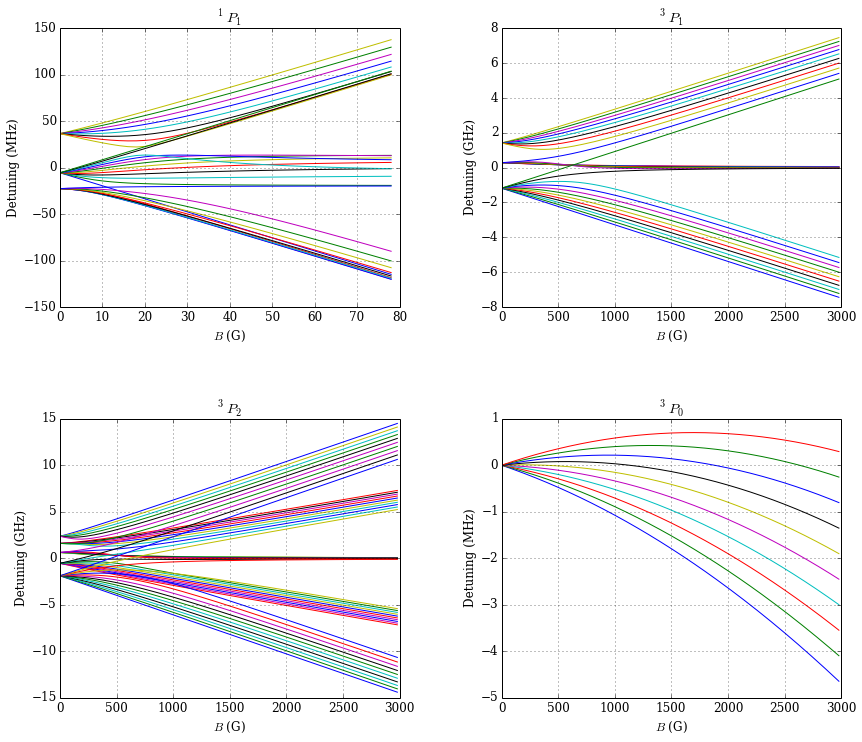

In [40]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from numpy import arange
from scipy.interpolate import UnivariateSpline

figure = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

ax1 = plt.subplot(gs[0,0]) 
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

for i in range(-13, 15, 2):
    label_3P1 = []
    index_3P1 = []
    label_3P2= []
    index_3P2 = []
    label_1P1 = []
    index_1P1 = []
    label_3P0 = []
    index_3P0 = []
    for j, n in enumerate(Subspace(i / 2)):
        if n[0] in [0, 1, 2]:   # 3P1
            index_3P1.append(j)
            label_3P1.append(Eigenvalues[n[0]][n[1]][0][5])         # Which F state
        if n[0] in [3, 4, 5, 6, 7]:   # 3P2
            index_3P2.append(j)
            label_3P2.append(Eigenvalues[n[0]][n[1]][0][5])         # Which F state
        if n[0] in [8, 9, 10]:     # 1P1
            index_1P1.append(j)
            label_1P1.append(Eigenvalues[n[0]][n[1]][0][5])         # Which F state
        if n[0] == 11:                  # 3P0
            index_3P0.append(j)
            label_3P0.append(Eigenvalues[n[0]][n[1]][0][5])         # Which F state
    #print index_1P1
    
    B = concatenate((range(0, 80, 2), range(80, 3000, 20)), axis = 1)
    #B = range(0, 80, 2)
    if index_3P1 != []:
        Z_3P1 = zeros((len(index_3P1), len(B)))
    if index_3P2 != []:
        Z_3P2 = zeros((len(index_3P2), len(B)))
    if index_1P1 != []:
        Z_1P1 = zeros((len(index_1P1), len(B)))
    if index_3P0 != []:  
        Z_3P0 = zeros((len(index_3P0), len(B)))
    #print Z_3P2
        
    for i_, B_ in enumerate(B):
        w, v = LA.eig(H_subspace(i / 2, B_))
        w_ = zeros(len(w))
        if i_ < 10:
            a = abs(v).argmax(axis=0)
            for b_, a_ in enumerate(a):
                w_[a_] = w[b_]
            for j_ in range(len(w_)):
                if j_ in index_3P1:
                    Z_3P1[index_3P1.index(j_)][i_] = w_[j_]
                if j_ in index_3P2:
                    Z_3P2[index_3P2.index(j_)][i_] = w_[j_]
                if j_ in index_1P1:
                    Z_1P1[index_1P1.index(j_)][i_] = w_[j_]
                if j_ in index_3P0:
                    Z_3P0[index_3P0.index(j_)][i_] = w_[j_]
        else:
            for j_ in range(len(index_3P1)):
                extrapolator = UnivariateSpline(B[i_ - 10: i_ - 1], Z_3P1[j_][i_ - 10: i_ - 1])
                #extrapolator.set_smoothing_factor(10000)
                y = extrapolator(B_)
                Z_3P1[j_][i_] = w[(abs(w-y)).argmin()]
            for j_ in range(len(index_3P2)):
                extrapolator = UnivariateSpline(B[i_ - 10: i_ - 1], Z_3P2[j_][i_ - 10: i_ - 1])
                extrapolator.set_smoothing_factor(0)
                y = extrapolator(B_)
                Z_3P2[j_][i_] = w[(abs(w-y)).argmin()]
            for j_ in range(len(index_1P1)):
                extrapolator = UnivariateSpline(B[i_ - 10: i_ - 1], Z_1P1[j_][i_ - 10: i_ - 1])
                #extrapolator.set_smoothing_factor(0)
                y = extrapolator(B_)
                Z_1P1[j_][i_] = w[(abs(w-y)).argmin()]
            for j_ in range(len(index_3P0)):
                extrapolator = UnivariateSpline(B[i_ - 10: i_ - 1], Z_3P0[j_][i_ - 10: i_ - 1])
                #extrapolator.set_smoothing_factor(0)
                y = extrapolator(B_)
                Z_3P0[j_][i_] = w[(abs(w-y)).argmin()]
    for i_ in range(len(index_1P1)):
        ax1.plot(B[0: 40], Z_1P1[i_][0: 40] - nu_1P1_0, markersize = 10)
    for i_ in range(len(index_3P1)):
        ax2.plot(B, (Z_3P1[i_] - nu_3P1_0) / 1000, markersize = 10)
    for i_ in range(len(index_3P2)):
        ax3.plot(B, (Z_3P2[i_] - nu_3P2_0) / 1000, markersize = 10)
    for i_ in range(len(index_3P0)):
        ax4.plot(B, Z_3P0[i_] - nu_3P0_0, markersize = 10)
                


ax1.set_xlabel("$B$ (G)")
ax1.set_ylabel("Detuning (MHz)")
ax1.set_title(r'$^1P_1$')
ax1.legend(loc = 1)
ax1.grid(1)

 
ax2.set_xlabel("$B$ (G)")
ax2.set_ylabel("Detuning (GHz)")
ax2.legend(loc = 1)
ax2.set_title(r'$^3P_1$')
ax2.grid(1)

ax3.set_xlabel("$B$ (G)")
ax3.set_ylabel("Detuning (GHz)")
ax3.legend(loc = 1)
ax3.set_title(r'$^3P_2$')
ax3.grid(1)

ax4.set_xlabel("$B$ (G)")
ax4.set_ylabel("Detuning (MHz)")
ax4.legend(loc = 1)
ax4.set_title(r'$^3P_0$')
ax4.grid(1)

plt.savefig('Zeeman shifts.svg')

In [41]:
###############################################
##### START THE CALCULATION FOR 3P0 state #####
###############################################

# In units of MHz
nu_3P0_0 = 429500000
nu_3P1_0 = 434829000 
I = 9 / 2


# II: matrix elements for F = I and F = I
# I1I1: matrix elements for F = I + 1 and F = I + 1
# I2I2: matrix elements for F = I - 1 and F = I - 1

def Zeeman_3P0(m_F, B):
    Hz_3P0_3P0_II = -1 * g_I * mu_B * m_F * B
    
    ##### The following three are wrong compared to computing the matrix elements from CG coefficients
    Hz_3P0_3P1_II = (g_S - g_L) * sqrt(2 / (3 * I * (I + 1))) * mu_B * m_F * B 
    Hz_3P0_3P1_II1 = (g_S - g_L) * sqrt(((I + 1) ** 2 - m_F ** 2) * (4 * I + 6) / (3 * (I + 1) * (4 * (I ** 2 + 1) - 1))) * mu_B * B
    Hz_3P0_3P1_II2 = 0
    if (int(m_F + I) > 0 and int(m_F + I - 1) < 8):
        Hz_3P0_3P1_II2 = Hz_3P0_3P1_II2 + (g_S - g_L) * sqrt(((I ** 2 - m_F ** 2) * (4 * I - 2) / (3 * I * (4 * I ** 2 - 1)))) * mu_B * B 
    
    Hz_3P1_3P1_II = ((g_L + g_S - g_I * (2 * I * (I + 1) - 2)) / (2 * I * (I + 1))) * mu_B * m_F * B
    Hz_3P1_3P1_I1I1 = ((g_L + g_S - g_I * 2 * I) / (2 * (I + 1))) * mu_B * m_F * B
    Hz_3P1_3P1_I2I2 = 0
    if (int(m_F + I) > 0 and int(m_F + I - 1) < 8):
        Hz_3P1_3P1_I2I2 = Hz_3P1_3P1_I2I2 -1 * ((g_L + g_S + g_I * 2 * (I + 1)) / (2 * I)) * mu_B * m_F * B
    
    Hz_1P1_1P1_II = ((g_L - g_I * (I * (I + 1) - 1)) / (I * (I + 1))) * mu_B * m_F * B
    Hz_1P1_1P1_I1I1 = ((g_L - g_I * I) / (I + 1)) * mu_B * m_F * B
    Hz_1P1_1P1_I2I2 = 0
    if (int(m_F + I) > 0 and int(m_F + I - 1) < 8):
        Hz_1P1_1P1_I2I2 = Hz_1P1_1P1_I2I2 -1 * ((g_L + g_I * (I + 1)) / I) * mu_B * m_F * B
    
    nu_3P0 = nu_3P0_0 + Hz_3P0_3P0_II + 2 * alpha_1 * Hz_3P0_3P1_II 
    nu_3P1 = nu_3P1_0 + alpha ** 2 * (Hz_3P1_3P1_II + Hz_3P1_3P1_I1I1 + Hz_3P1_3P1_I2I2) + beta ** 2 * (Hz_1P1_1P1_II + Hz_1P1_1P1_I1I1 + Hz_1P1_1P1_I2I2)
    
    result = 0.5 * (nu_3P0 + nu_3P1) + 0.5 * (nu_3P0 - nu_3P1) * sqrt(1 + 4 * alpha ** 2 * (Hz_3P0_3P1_II ** 2 + Hz_3P0_3P1_II1 ** 2 + Hz_3P0_3P1_II2 ** 2) / (nu_3P0 - nu_3P1) ** 2)

    return result


def Zeeman_1S0(m_F, B):
    Hz_3P0_3P0_II = -1 * g_I * mu_B * m_F * B
    result = nu_3P0_0 + Hz_3P0_3P0_II
    return result

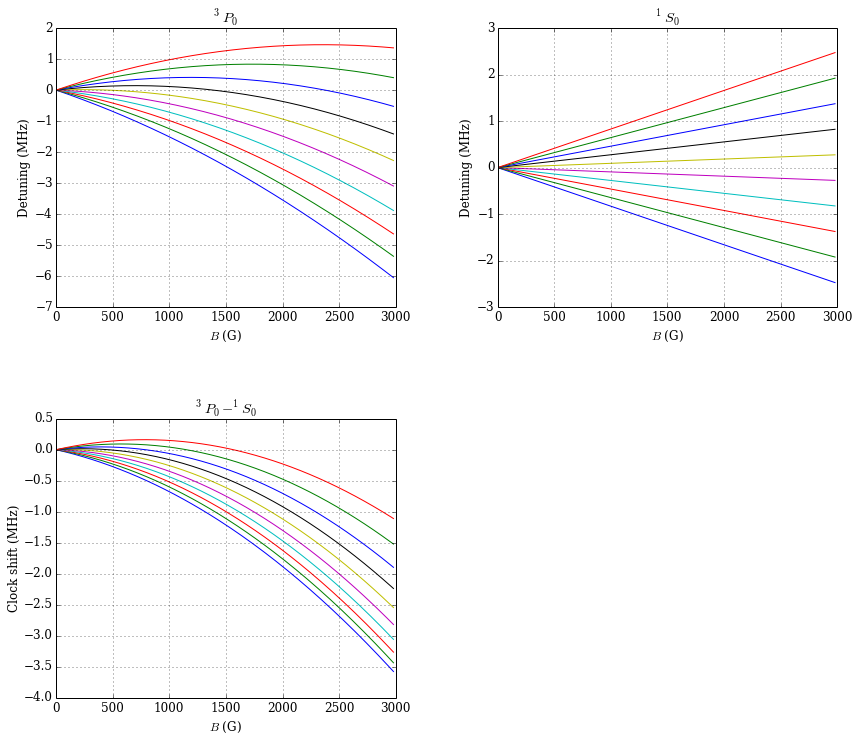

In [121]:
#######################################
#### ANALYTICAL RESULTS SEEM WRONG ####
#######################################

B = range(0, 3000, 20)
Z1 = zeros((10, len(B)))
Z2 = zeros((10, len(B)))
for i, B_ in enumerate(B):
    for j, f in enumerate(range(-9, 11, 2)):
        Z1[j][i] = Zeeman_3P0(f / 2, B_)
        Z2[j][i] = Zeeman_1S0(f / 2, B_)
        
figure = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0]) 
for j, f in enumerate(range(-9, 11, 2)):
    ax1.plot(B, Z1[j] - nu_3P0_0, markersize = 10)
#ax1.plot(x1, th ,color = 'g',linestyle = '-', markersize = 10, label = r'Alt,$\  y = \frac{5.54}{x ^2} $')
ax1.set_xlabel("$B$ (G)")
ax1.set_ylabel(r"Detuning (MHz)")
ax1.legend(loc = 1)
ax1.set_title('$^3P_0$')
ax1.grid(1)

ax2 = plt.subplot(gs[0,1]) 
for j, f in enumerate(range(-9, 11, 2)):
    ax2.plot(B, Z2[j] - nu_3P0_0 , markersize = 10)
ax2.set_xlabel("$B$ (G)")
ax2.set_ylabel(r"Detuning (MHz)")
ax2.legend(loc = 1)
ax2.set_title('$^1S_0$')
ax2.grid(1)

ax3 = plt.subplot(gs[1,0]) 
for j, f in enumerate(range(-9, 11, 2)):
    ax3.plot(B, Z1[j] - Z2[j] , markersize = 10)
ax3.set_xlabel("$B$ (G)")
ax3.set_ylabel(r"Clock shift (MHz)")
ax3.legend(loc = 1)
ax3.set_title('$^3P_0 - ^1 S_0$')
ax3.grid(1)

In [181]:
###############################################
##### START THE CALCULATION FOR 3P0 state #####
###############################################

# In units of MHz
nu_3P0_0 = 429500000
nu_3P1_0 = 434829000 
I = 9 / 2


# II: matrix elements for F = I and F = I
# I1I1: matrix elements for F = I + 1 and F = I + 1
# I2I2: matrix elements for F = I - 1 and F = I - 1

def Zeeman_3P0(m_F, B):
    Hz_3P0_3P0_II = Zeeman(11, int(m_F + I), 11, int(m_F + I)) * B
    
    Hz_3P0_3P1_II = Zeeman(11, int(m_F + I), 1, int(m_F + I)) * B
    Hz_3P0_3P1_II1 = Zeeman(11, int(m_F + I), 0, int(m_F + I + 1)) * B
    Hz_3P0_3P1_II2 = 0
    if (int(m_F + I) > 0 and int(m_F + I - 1) < 8):
        #print 'true'
        Hz_3P0_3P1_II2 = Hz_3P0_3P1_II2 + Zeeman(11, int(m_F + I), 2, int(m_F + I - 1)) * B
    #print Hz_3P0_3P1_II2
    #print(int(m_F + I))
    Hz_3P1_3P1_II = Zeeman(1, int(m_F + I), 1, int(m_F + I)) * B
    Hz_3P1_3P1_I1I1 = Zeeman(0, int(m_F + I + 1), 0, int(m_F + I + 1)) * B
    Hz_3P1_3P1_I2I2 = 0
    if (int(m_F + I) > 0 and int(m_F + I - 1) < 8):
        Hz_3P1_3P1_I2I2 = Hz_3P1_3P1_I2I2 + Zeeman(2, int(m_F + I - 1), 2, int(m_F + I - 1)) * B
    
    Hz_1P1_1P1_II = Zeeman(9, int(m_F + I), 9, int(m_F + I)) * B
    Hz_1P1_1P1_I1I1 = Zeeman(8, int(m_F + I + 1), 8, int(m_F + I + 1)) * B
    Hz_1P1_1P1_I2I2 = 0
    if (int(m_F + I) > 0 and int(m_F + I - 1) < 8):
        Hz_1P1_1P1_I2I2 = Hz_1P1_1P1_I2I2 + Zeeman(10, int(m_F + I - 1), 10, int(m_F + I - 1)) * B
    
    nu_3P0 = nu_3P0_0 + Hz_3P0_3P0_II + 2 * alpha_1 * Hz_3P0_3P1_II 
    nu_3P1 = nu_3P1_0 + alpha ** 2 * (Hz_3P1_3P1_II + Hz_3P1_3P1_I1I1 + Hz_3P1_3P1_I2I2) + beta ** 2 * (Hz_1P1_1P1_II + Hz_1P1_1P1_I1I1 + Hz_1P1_1P1_I2I2)
    
    result = 0.5 * (nu_3P0 + nu_3P1) + 0.5 * (nu_3P0 - nu_3P1) * sqrt(1 + 4 * alpha ** 2 * (Hz_3P0_3P1_II ** 2 + Hz_3P0_3P1_II1 ** 2 + Hz_3P0_3P1_II2 ** 2) / (nu_3P0 - nu_3P1) ** 2)

    return result


def Zeeman_1S0(m_F, B):
    Hz_3P0_3P0_II = Zeeman(11, int(m_F + I), 11, int(m_F + I)) * B
    result = nu_3P0_0 + Hz_3P0_3P0_II
    return result

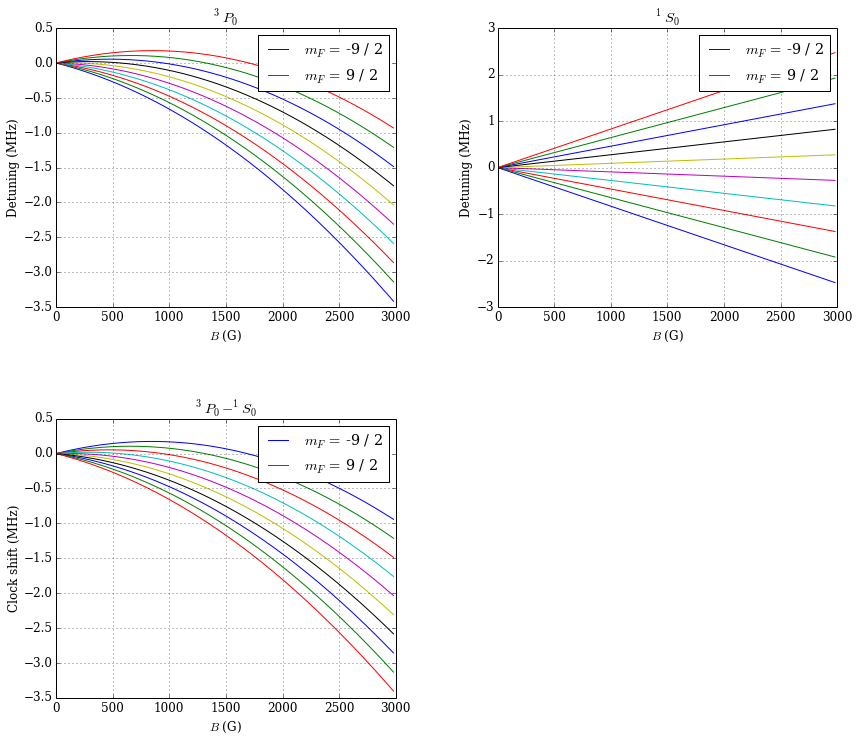

In [182]:
B = range(0, 3000, 20)
Z1 = zeros((10, len(B)))
Z2 = zeros((10, len(B)))
for i, B_ in enumerate(B):
    for j, f in enumerate(range(-9, 11, 2)):
        #print j, f / 2
        Z1[j][i] = Zeeman_3P0(f / 2, B_)
        Z2[j][i] = Zeeman_1S0(f / 2, B_)
        
figure = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)
ax1 = plt.subplot(gs[0,0]) 
for j, f in enumerate(range(-9, 11, 2)):
    if (f == -9 or f == 9):
        ax1.plot(B, Z1[j] - nu_3P0_0, markersize = 10, label = '$m_F =$ %d / 2' %f)
    else:
        ax1.plot(B, Z1[j] - nu_3P0_0, markersize = 10)
#ax1.plot(x1, th ,color = 'g',linestyle = '-', markersize = 10, label = r'Alt,$\  y = \frac{5.54}{x ^2} $')
ax1.set_xlabel("$B$ (G)")
ax1.set_ylabel(r"Detuning (MHz)")
ax1.legend(loc=1)
ax1.set_title('$^3P_0$')
ax1.grid(1)

ax2 = plt.subplot(gs[0,1]) 
for j, f in enumerate(range(-9, 11, 2)):
    if (f == -9 or f == 9):
        ax2.plot(B, Z2[j] - nu_3P0_0 , markersize = 10, label = '$m_F =$ %d / 2' %f)
    else:
        ax2.plot(B, Z2[j] - nu_3P0_0 , markersize = 10)
ax2.set_xlabel("$B$ (G)")
ax2.set_ylabel(r"Detuning (MHz)")
ax2.legend(loc=1)
ax2.set_title('$^1S_0$')
ax2.grid(1)

ax3 = plt.subplot(gs[1,0]) 
for j, f in enumerate(range(-9, 11, 2)):
    if (f == -9 or f == 9):
        ax3.plot(B, Z1[j] - Z2[j] , markersize = 10, label = '$m_F =$ %d / 2' %f)
    else:
        ax3.plot(B, Z1[j] - Z2[j] , markersize = 10)
ax3.set_xlabel("$B$ (G)")
ax3.set_ylabel(r"Clock shift (MHz)")
ax3.legend(loc=1)
ax3.set_title('$^3P_0 - ^1 S_0$')
ax3.grid(1)


plt.savefig('3P0 clock shift .svg')

In [108]:
print CGcoefficients[11][0]
print Eigenvalues[11][0]
print CGcoefficients[0][1]
print Eigenvalues[0][1]

print Zeeman(11,2,2,1)
print (g_S - g_L) * sqrt(((I ** 2 - 2.5 ** 2) * (4 * I - 2) / (3 * I * (4 * I ** 2 - 1)))) * mu_B 

[ 1.]
[('3P0', 0.0, 4.5, 0.0, -4.5, 4.5, -4.5)]
[ 0.90453403  0.42640143  0.        ]
[('3P1', 1.0, 4.5, -1.0, -3.5, 5.5, -4.5)
 ('3P1', 1.0, 4.5, 0.0, -4.5, 5.5, -4.5)
 ('3P1', 1.0, 4.5, 1.0, -5.5, 5.5, -4.5)]
-0.63716012566
0.637417265147


In [113]:
print CGcoefficients1[3][0]
print Eigenvalues1[3][0]
print CGcoefficients1[0][1]
print Eigenvalues1[0][1]

[ 0.57735027 -0.57735027  0.57735027]
[('3P0', 1.0, 1.0, -1.0, 1.0, 0.0, 0.0)
 ('3P0', 1.0, 1.0, 0.0, 0.0, 0.0, 0.0)
 ('3P0', 1.0, 1.0, 1.0, -1.0, 0.0, 0.0)]
[-0.70710678  0.          0.70710678]
[('3P1', 1.0, 1.0, -1.0, 1.0, 1.0, 0.0)
 ('3P1', 1.0, 1.0, 0.0, 0.0, 1.0, 0.0)
 ('3P1', 1.0, 1.0, 1.0, -1.0, 1.0, 0.0)]


In [57]:
#####################################
#### Test for analytical results ####
#####################################

m_F = -4.5
Hz_3P0_3P0_II = -1 * g_I * mu_B * m_F
    
##### The following three are wrong compared to computing the matrix elements from CG coefficients
### MINUS?? NOT EXACT??
Hz_3P0_3P1_II = (g_S - g_L) * sqrt(2 / (3 * I * (I + 1))) * mu_B * m_F 
### NOT EXACT??
Hz_3P0_3P1_II1 = (g_S - g_L) * sqrt(((I + 1) ** 2 - m_F ** 2) * (4 * I + 6) / (3 * (I + 1) * (4 * (I ** 2 + 1) - 1))) * mu_B
### MINUS?? NOT EXACT??
Hz_3P0_3P1_II2 = 0
if (int(m_F + I) > 0 and int(m_F + I - 1) < 8):
    Hz_3P0_3P1_II2 = Hz_3P0_3P1_II2 + (g_S - g_L) * sqrt(((I ** 2 - m_F ** 2) * (4 * I - 2) / (3 * I * (4 * I ** 2 - 1)))) * mu_B 
    
Hz_3P1_3P1_II = ((g_L + g_S - g_I * (2 * I * (I + 1) - 2)) / (2 * I * (I + 1))) * mu_B * m_F
Hz_3P1_3P1_I1I1 = ((g_L + g_S - g_I * 2 * I) / (2 * (I + 1))) * mu_B * m_F
Hz_3P1_3P1_I2I2 = 0
if (int(m_F + I) > 0 and int(m_F + I - 1) < 8):
    Hz_3P1_3P1_I2I2 = Hz_3P1_3P1_I2I2 -1 * ((g_L + g_S + g_I * 2 * (I + 1)) / (2 * I)) * mu_B * m_F
    
Hz_1P1_1P1_II = ((g_L - g_I * (I * (I + 1) - 1)) / (I * (I + 1))) * mu_B * m_F
Hz_1P1_1P1_I1I1 = ((g_L - g_I * I) / (I + 1)) * mu_B * m_F
Hz_1P1_1P1_I2I2 = 0
if (int(m_F + I) > 0 and int(m_F + I - 1) < 8):
    Hz_1P1_1P1_I2I2 = Hz_1P1_1P1_I2I2 -1 * ((g_L + g_I * (I + 1)) / I) * mu_B * m_F

print (nu_3P0_0 - nu_3P1_0) / (Zeeman(11, 0, 1, 0) * 3000) * nu_3P0_0
print Eigenvalues[0][1]
print Hz_3P0_3P1_II
print Zeeman(11, 0, 11, 0)
print Zeeman(11, 0, 0, 1)
print Zeeman(11, 1, 2, 0)

-738604808852.0
[('3P1', 1.0, 4.5, -1.0, -3.5, 5.5, -4.5)
 ('3P1', 1.0, 4.5, 0.0, -4.5, 5.5, -4.5)
 ('3P1', 1.0, 4.5, 1.0, -5.5, 5.5, -4.5)]
-1.03369156837
-0.000829819271715
0.486933042308
-0.481570030563
